In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pdb
import caffe

In [2]:
last_deploy = 'deploy_SE.prototxt'    # old network deploy file
last_model = 'googlenet_SE.caffemodel'    # model parameters to be pruned

In [3]:
caffe.set_mode_gpu()
caffe.set_device(0)

model_def = last_deploy
model_weights = last_model
mu = np.load('train_mean_global.npy')
mu = mu.mean(1).mean(1)
net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

picture_num = 1
positive_count = 0
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data',mu)
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))
net.blobs['data'].reshape(picture_num,
                                  3,
                                  224, 224)

layers_dict ={}    # save the channel weights of all convolutional layers.
layers_list = []
for layer_name, blob in net.blobs.iteritems():
    if 'up' in layer_name:
        print(layer_name)
        layers_list.append(layer_name)
        layers_dict[layer_name] = np.zeros(blob.data.size/10)
        print(blob.data.size/10)

image_file = 'train.txt'
train_num = 0
with open(image_file, 'r') as image_list:
    for image in image_list:
        image_source = image.strip().split(' ')[0]
        label = int(image.strip().split(' ')[1])
        image = caffe.io.load_image(image_source)
        transformed_image = transformer.preprocess('data',image)
        net.blobs['data'].data[0] = transformed_image
        output = net.forward()
        for layer_name, blob in net.blobs.iteritems():
            if 'up' in layer_name:
                layers_dict[layer_name] = layers_dict[layer_name] + blob.data[0,:,0,0]    # the scale factors saved in layers named "xxx_up".
        print(image_source + 'processed.')
        train_num = train_num + 1
print('Done.')
for layer_name in layers_list:
    layers_dict[layer_name] = layers_dict[layer_name]/train_num    # compute the channel weights, use mean of all the scale factors we collected when training.

inception_3a_1x1_up
256
inception_3b_1x1_up
480
inception_4a_1x1_up
512
inception_4b_1x1_up
512
inception_4c_1x1_up
512
inception_4d_1x1_up
528
inception_4e_1x1_up
832


/usr/lib64/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-001.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-002.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-003.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-004.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-005.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-007.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-008.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549AB-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_A-14-22549A

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-026.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-027.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-028.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-029.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-030.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-031.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-032.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-033.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-034.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-035.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-14134-40-036.jpgprocessed.

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060AB-40-020.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060AB-40-021.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060AB-40-022.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060AB-40-023.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060CD-40-001.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060CD-40-002.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060CD-40-003.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060CD-40-004.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060CD-40-005.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060CD-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_F-14-23060C

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-22704-40-033.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-22704-40-034.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-22704-40-035.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-22704-40-036.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-22704-40-037.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-22704-40-038.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-29315EF-40-001.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-29315EF-40-002.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-29315EF-40-003.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-29315EF-40-004.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_PT-14-29315EF

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-007.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-008.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-011.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-012.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-013.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-014.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_TA-14-21978AB-40-015.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_B_T

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-023.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-024.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-025.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-026.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-027.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-028.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-029.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-030.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-031.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13412-40-032.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-13993-40-001.jp

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-007.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-008.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-011.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-012.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-013.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-014.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-015.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-14946-40-016.jp

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-011.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-012.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-013.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-014.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-015.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-016.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-017.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-018.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-16188-40-019.jp

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-17901-40-025.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-17901-40-026.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-001.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-002.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-003.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-004.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-005.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-007.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-008.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-20629-40-009.jp

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-007.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-008.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-011.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-012.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-013.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-014.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-015.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-4372-40-016.jpgprocessed.

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-001.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-002.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-003.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-004.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-005.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-006.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-007.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-008.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_DC-14-9461-40-011.jpgprocessed.

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-016.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-017.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-018.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-019.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-020.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-021.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_LC-14-16196-40-022.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-10147-40-001.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-10147-40-002.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-10147-40-003.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-10147-40-004.jp

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-059.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-060.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-062.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-064.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-065.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-066.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-067.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-068.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-069.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-070.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_MC-14-16456-40-071.jp

/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-009.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-010.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-011.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-012.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-013.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-014.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-015.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-016.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-017.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-018.jpgprocessed.
/home/public/BreaKHis7909/preprocess/fold1/train/40X/SOB_M_PC-14-19440-40-019.jp

256 127
480 239
512 255
512 255
512 255
528 263
832 415
chn_sum: 1809
conv1/7x7_s2
conv1/bn
conv1/scale
conv2/3x3_reduce
conv2/relu_3x3_bn
conv2/relu_3x3_scale
conv2/3x3
conv2/relu_bn
conv2/relu_scale
inception_3a/1x1
(35, 192, 1, 1)
inception_3a/relu_1x1_bn
inception_3a/relu_1x1_scale
inception_3a/3x3_reduce
inception_3a/relu_3x3_reduce_bn
inception_3a/relu_3x3_reduce_scale
inception_3a/3x3
(62, 96, 3, 3)
inception_3a/relu_3x3_bn
inception_3a/relu_3x3_scale
inception_3a/5x5_reduce
inception_3a/relu_5x5_reduce_bn
inception_3a/relu_5x5_reduce_scale
inception_3a/5x5
(16, 16, 5, 5)
inception_3a/relu_5x5_bn
inception_3a/relu_5x5_scale
inception_3a/pool_proj
(14, 192, 1, 1)
inception_3a/relu_pool_proj_bn
inception_3a/relu_pool_proj_scale
inception_3a_1x1_down
inception_3a_1x1_up
inception_3b/1x1
(60, 127, 1, 1)
 inception_3b/relu_1x1_bn
inception_3b/relu_1x1_scale
inception_3b/3x3_reduce
inception_3b/relu_3x3_reduce_bn
inception_3b/relu_3x3_reduce_scale
inception_3b/3x3
(98, 128, 3, 3)
ince

ValueError: could not broadcast input array from shape (2,415) into shape (2,1188)

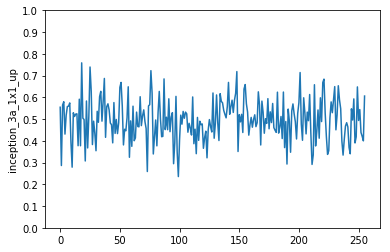

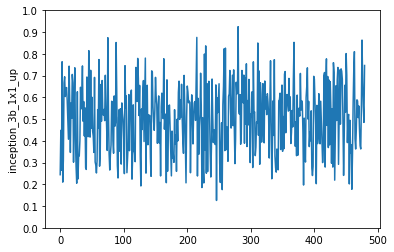

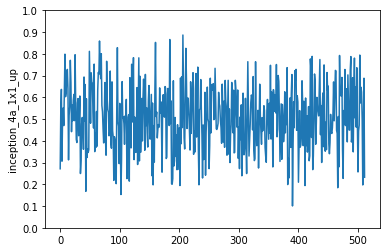

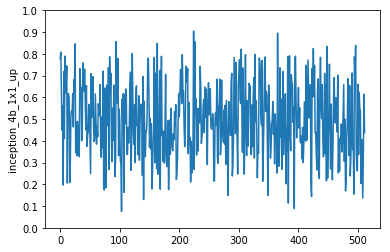

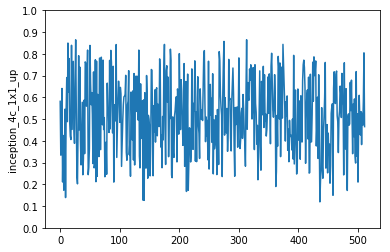

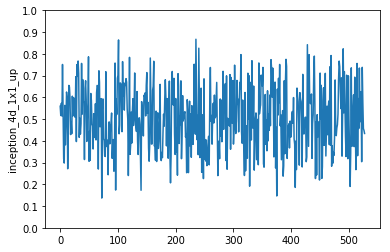

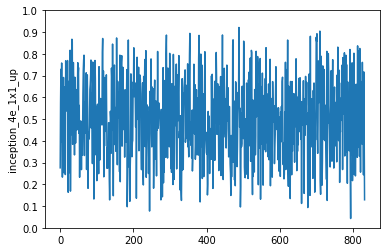

In [4]:
for layer_name in layers_list:
    plt.figure(layer_name)
    plt.ylabel(layer_name)
    plt.ylim(0.0,1.0,10)
    yticks = np.linspace(0.00,1.00,11)
    plt.yticks(yticks)
    plt.plot(layers_dict[layer_name])
    
c_rate = 0.5    # prune rate. If you want to set how many channels to prune directly, you can set this value. For example, 0.5 means prune 50% channels in a convolutionnal layer.
#k = 0.1    # k in our paper. If you want to dynamically control how many channels to prune automatically, use this.
sorted_layers_dict = {}
for layer_name in layers_list:
    sorted_layers_dict[layer_name] = sorted(layers_dict[layer_name])
    
threshold_dict = {}    # save the prune threshold of each convolutional layer.
for layer in layers_list:
    #threshold_dict[layer] = np.mean(layers_dict[layer])-(k-np.std(layers_dict[layer]))    # dynamically compute the prune threshold.
    threshold_dict[layer] = sorted_layers_dict[layer][int(len(sorted_layers_dict[layer])*c_rate)]    # directly use prune rate to compute the prune threshold.
threshold_dict

channels = {}    # This contains the channels whose channel weight is larger than the threshold, so we can compute the number of channels after pruning and use the remaining channel parameters for next train.
for layer in layers_list:
    channels[layer] = np.where(layers_dict[layer]>threshold_dict[layer])[0]
    print layers_dict[layer].size,channels[layer].size

In [ ]:
# Now you can get your new network structure after pruning because you have known how many channels in each convolutional layer.
# And you can get remaining model parameters after pruning because you have known which channels are pruned and which remained.
# Finally, you should train the network pruned using the remaining model parameters to make up for the loss of precision.